## Generate plots for posters and papers

La prossima volta che devo fare dei plot per una presentazione/poster, usare questo script e pulirlo (e.g., una sezione per ogni tipo di immagine).

Author: Prisca Dotti  
Last modified: 03.10.2023

In [3]:
# autoreload is used to reload modules automatically before entering the
# execution of code typed at the IPython prompt.
%load_ext autoreload
%autoreload 2
# To import modules from parent directory in Jupyter Notebook
import sys

sys.path.append("..")

In [2]:
import os
import imageio
from skimage.io import imsave
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import napari
from napari.utils.theme import available_themes

from utils.in_out_tools import load_movies_ids, load_annotations_ids
from evaluation.metrics_tools import compute_f_score, compute_mcc
from data.data_processing_tools import process_raw_predictions, preds_dict_to_mask
from utils.visualization_tools import (
    get_annotations_contour,
    get_discrete_cmap,
    get_labels_cmap,
)

from config import config

In [4]:
BASEDIR = os.path.abspath("")
BASEDIR

'c:\\Users\\prisc\\Code\\sparks_project\\sparks'

## Set working directories

In [5]:
use_training_data = False
training_name = "TEMP_new_annotated_peaks_physio"
ignore_frames = 6  # first and last 6 frames not used for computing metrics

epoch = 100000

In [6]:
# raw data directories
raw_data_dir = os.path.join("..", "data", "raw_data_and_processing")
raw_movies_dir = os.path.join(raw_data_dir, "original_movies")
raw_masks_dir = os.path.join(raw_data_dir, "original_masks")

dataset_dir = os.path.join("..", "data", "sparks_dataset")

# poster directory
# poster_dir = r"C:\Users\dotti\OneDrive - Universitaet Bern\CONFERENCES SYMPOSIUMS etc\EWGCCE meeting 22\figures"
# poster_dir = "C:/Users/dotti/OneDrive - Universitaet Bern/midterm/figures"
poster_dir = r"C:\Users\dotti\OneDrive - Universitaet Bern\CONFERENCES SYMPOSIUMS etc\biophysical conference 2023"

In [7]:
if not use_training_data:
    metrics_dir = os.path.join("trainings_validation", training_name)
else:
    metrics_dir = os.path.join("trainings_validation", "train_samples", training_name)

preds_dir = metrics_dir

# TOLEDO

In [8]:
per_pixel_res_dir = os.path.join(metrics_dir, "per_pixel_results")

spark_peaks_res_dir = os.path.join(metrics_dir, "spark_peaks_results")

## Ca2+ events signal plots (TOLEDO)

In [9]:
font = {"weight": "normal", "size": 24}  #'family' : 'normal',

In [10]:
matplotlib.rc("font", **font)

### Spark

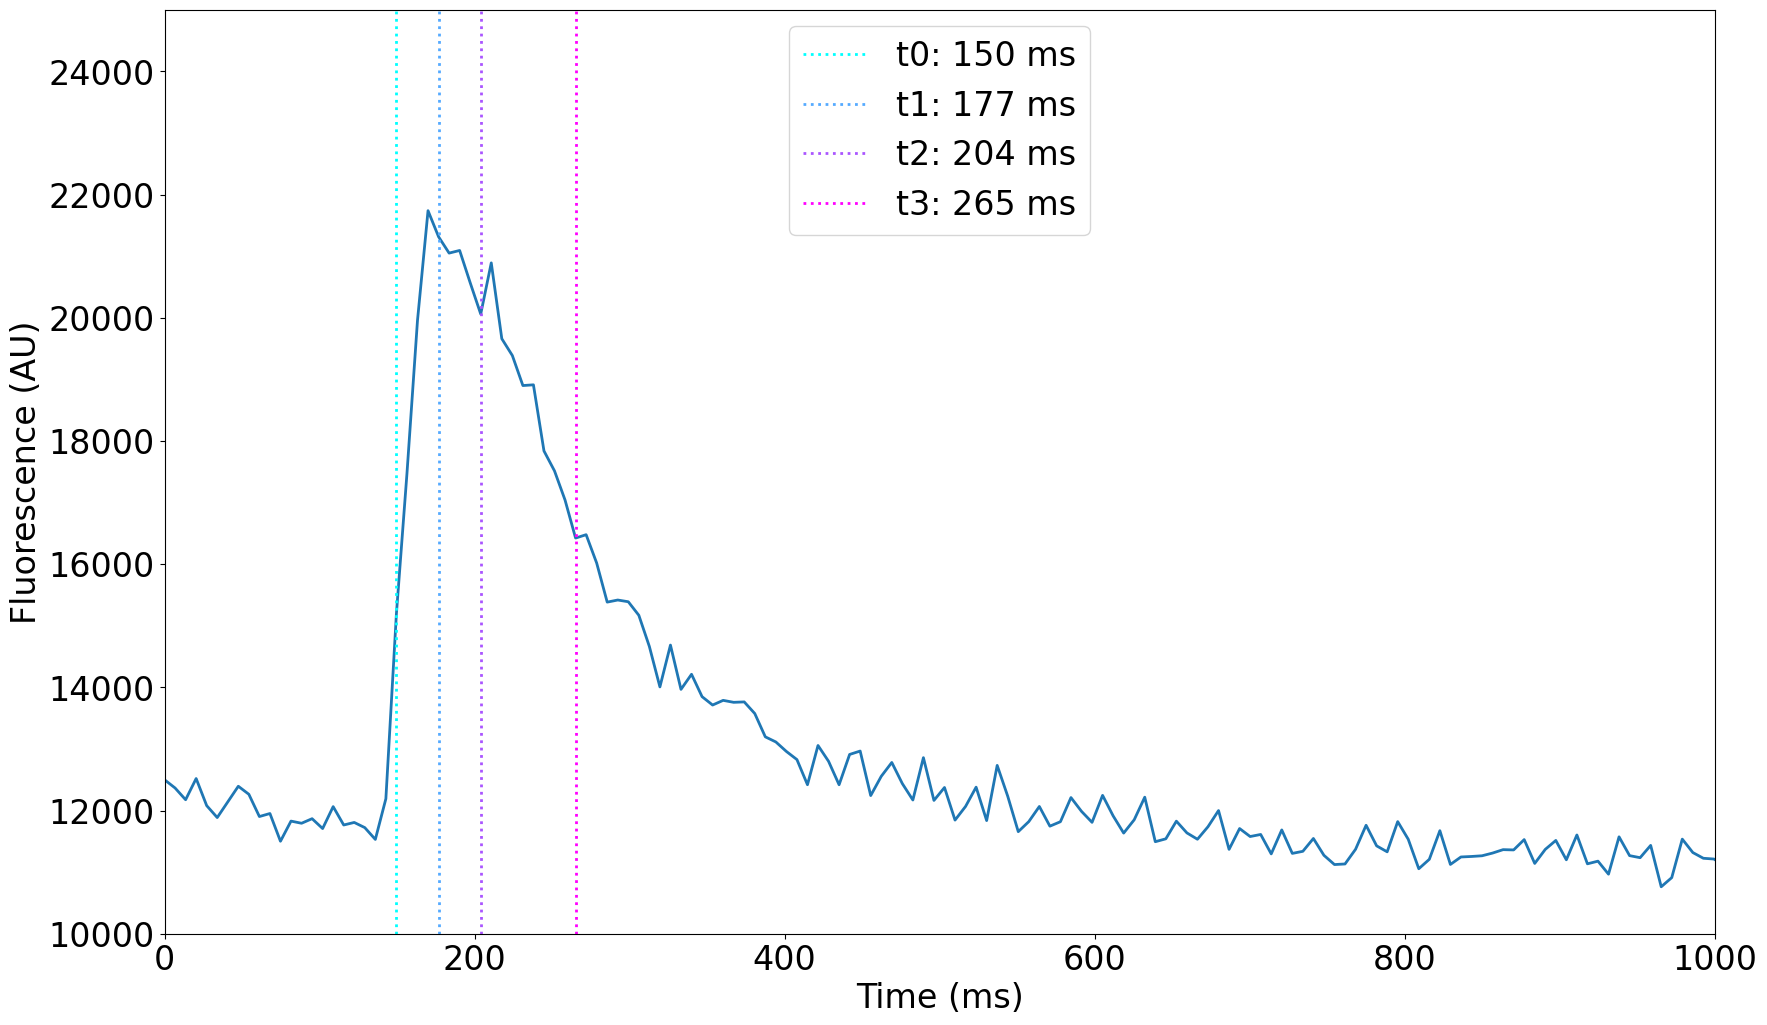

In [13]:
spark_sample_data_dir = os.path.join(poster_dir, "spark_example")
spark_sample_data_file = os.path.join(spark_sample_data_dir, "signal_plot.csv")

spark_event_df = pd.read_csv(spark_sample_data_file)

time_steps_idx = [22, 26, 30, 39]
time_steps = [spark_event_df["Time_(ms)"][t] for t in time_steps_idx]

fig, ax = plt.subplots()
spark_event_df.plot(
    figsize=(20, 12),
    ax=ax,
    x="Time_(ms)",
    y="Fluorescence_(AU)",
    xlabel="Time (ms)",
    ylabel="Fluorescence (AU)",
    xlim=(0, 1000),
    ylim=(10000, 25000),
    legend=False,
    lw=2,
    label="_nolegend_",
    # fontsize=16
)

color = cm.cool(np.linspace(0, 1, len(time_steps)))
for i, t in enumerate(time_steps):
    ax.axvline(t, color=color[i], linestyle="dotted", lw=2, label=f"t{i}: {t:.0f} ms")

plt.legend(loc=9)
plt.savefig(
    os.path.join(spark_sample_data_dir, "spark_example_plot.png"), bbox_inches="tight"
)

### Puff

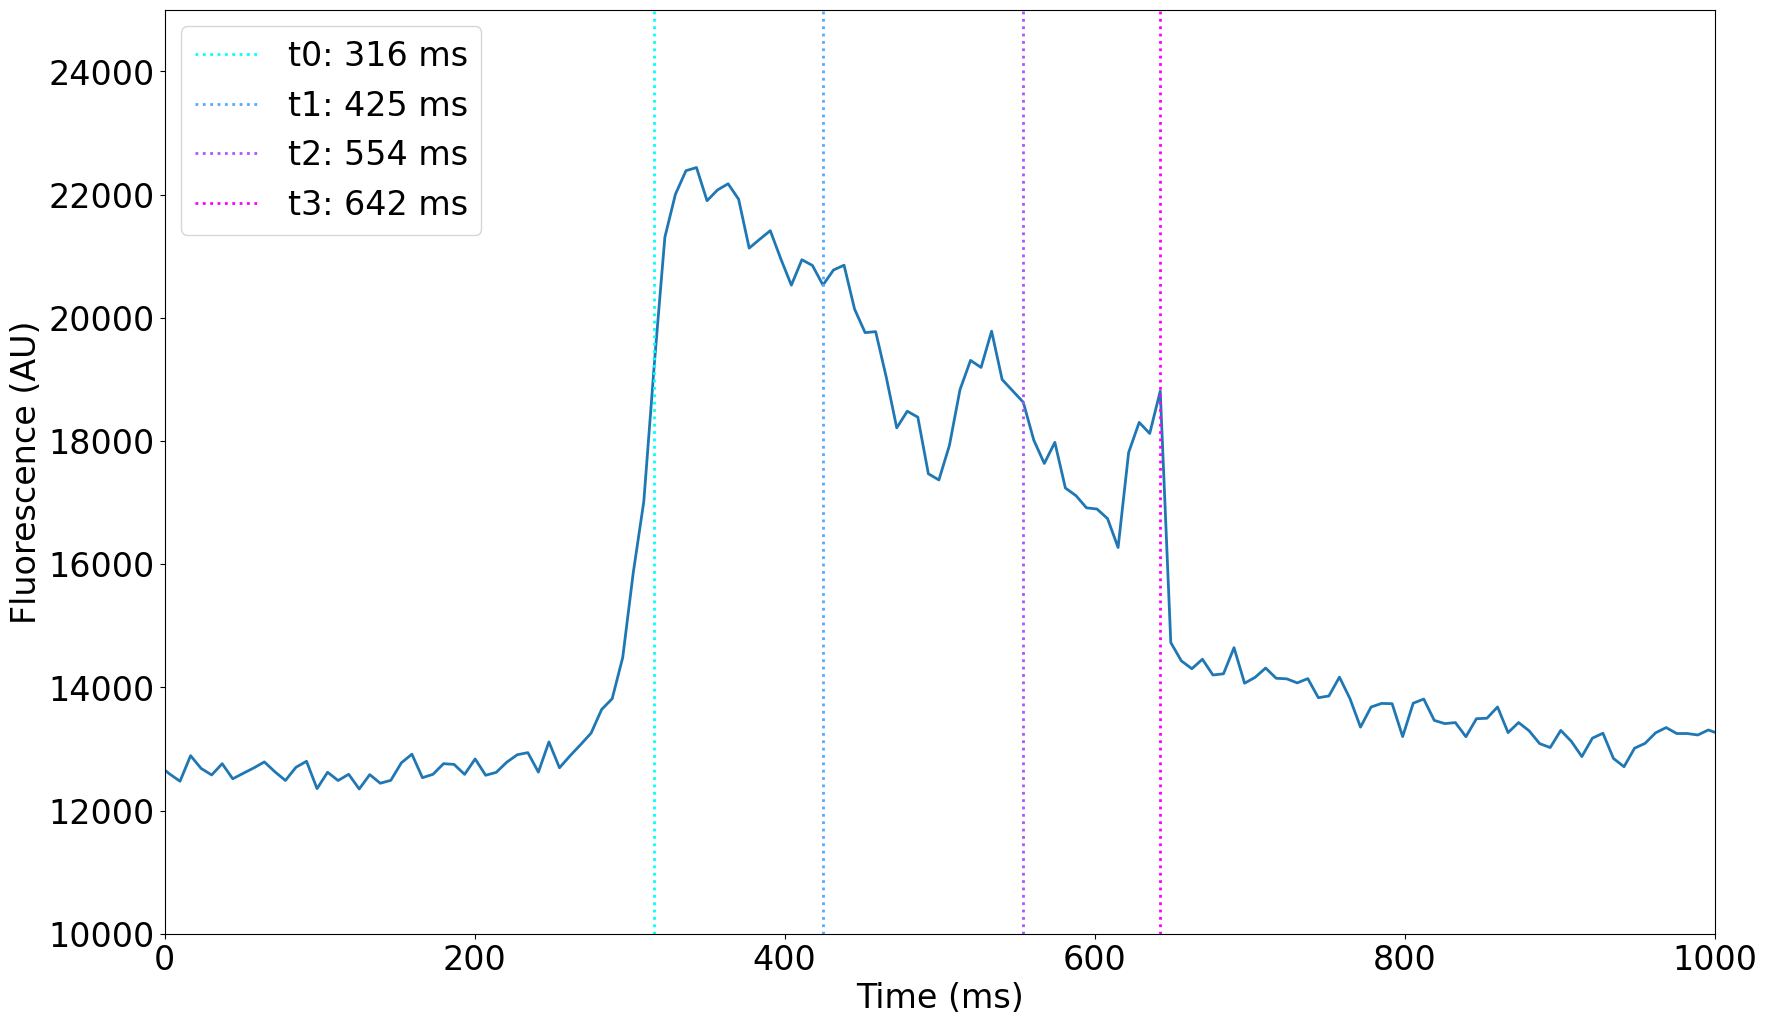

In [14]:
puff_sample_data_dir = os.path.join(poster_dir, "puff_example")
puff_sample_data_file = os.path.join(puff_sample_data_dir, "signal_plot.csv")

puff_event_df = pd.read_csv(puff_sample_data_file)

offset = 500

time_steps_idx = [120, 136, 155, 168]
time_steps = [puff_event_df["Time_(ms)"][t] - offset for t in time_steps_idx]

puff_event_df["Time_(ms)"] = puff_event_df["Time_(ms)"].subtract(offset)

fig, ax = plt.subplots()
puff_event_df.plot(
    figsize=(20, 12),
    ax=ax,
    x="Time_(ms)",
    y="Fluorescence_(AU)",
    xlabel="Time (ms)",
    ylabel="Fluorescence (AU)",
    xlim=(0, 1000),
    ylim=(10000, 25000),
    legend=False,
    lw=2,
    label="_nolegend_",
    # fontsize=16
)

color = cm.cool(np.linspace(0, 1, len(time_steps)))
for i, t in enumerate(time_steps):
    ax.axvline(t, color=color[i], linestyle="dotted", lw=2, label=f"t{i}: {t:.0f} ms")

plt.legend(loc=2)
plt.savefig(
    os.path.join(puff_sample_data_dir, "puff_example_plot.png"), bbox_inches="tight"
)

### Wave

In [15]:
wave_sample_data_dir = os.path.join(poster_dir, "wave_example")
wave_sample_data_file = os.path.join(wave_sample_data_dir, "signal_plot.csv")

wave_event_df = pd.read_csv(wave_sample_data_file)

In [16]:
wave_event_df

,Time_(ms),Fluorescence_(AU)
0,0.0,6533.792
1,6.8,6436.868
2,13.6,6418.581
3,20.4,6440.996
4,27.2,6693.033
...,...,...
495,3366.0,7239.574
496,3372.8,6972.730
497,3379.6,6956.548
498,3386.4,6896.305


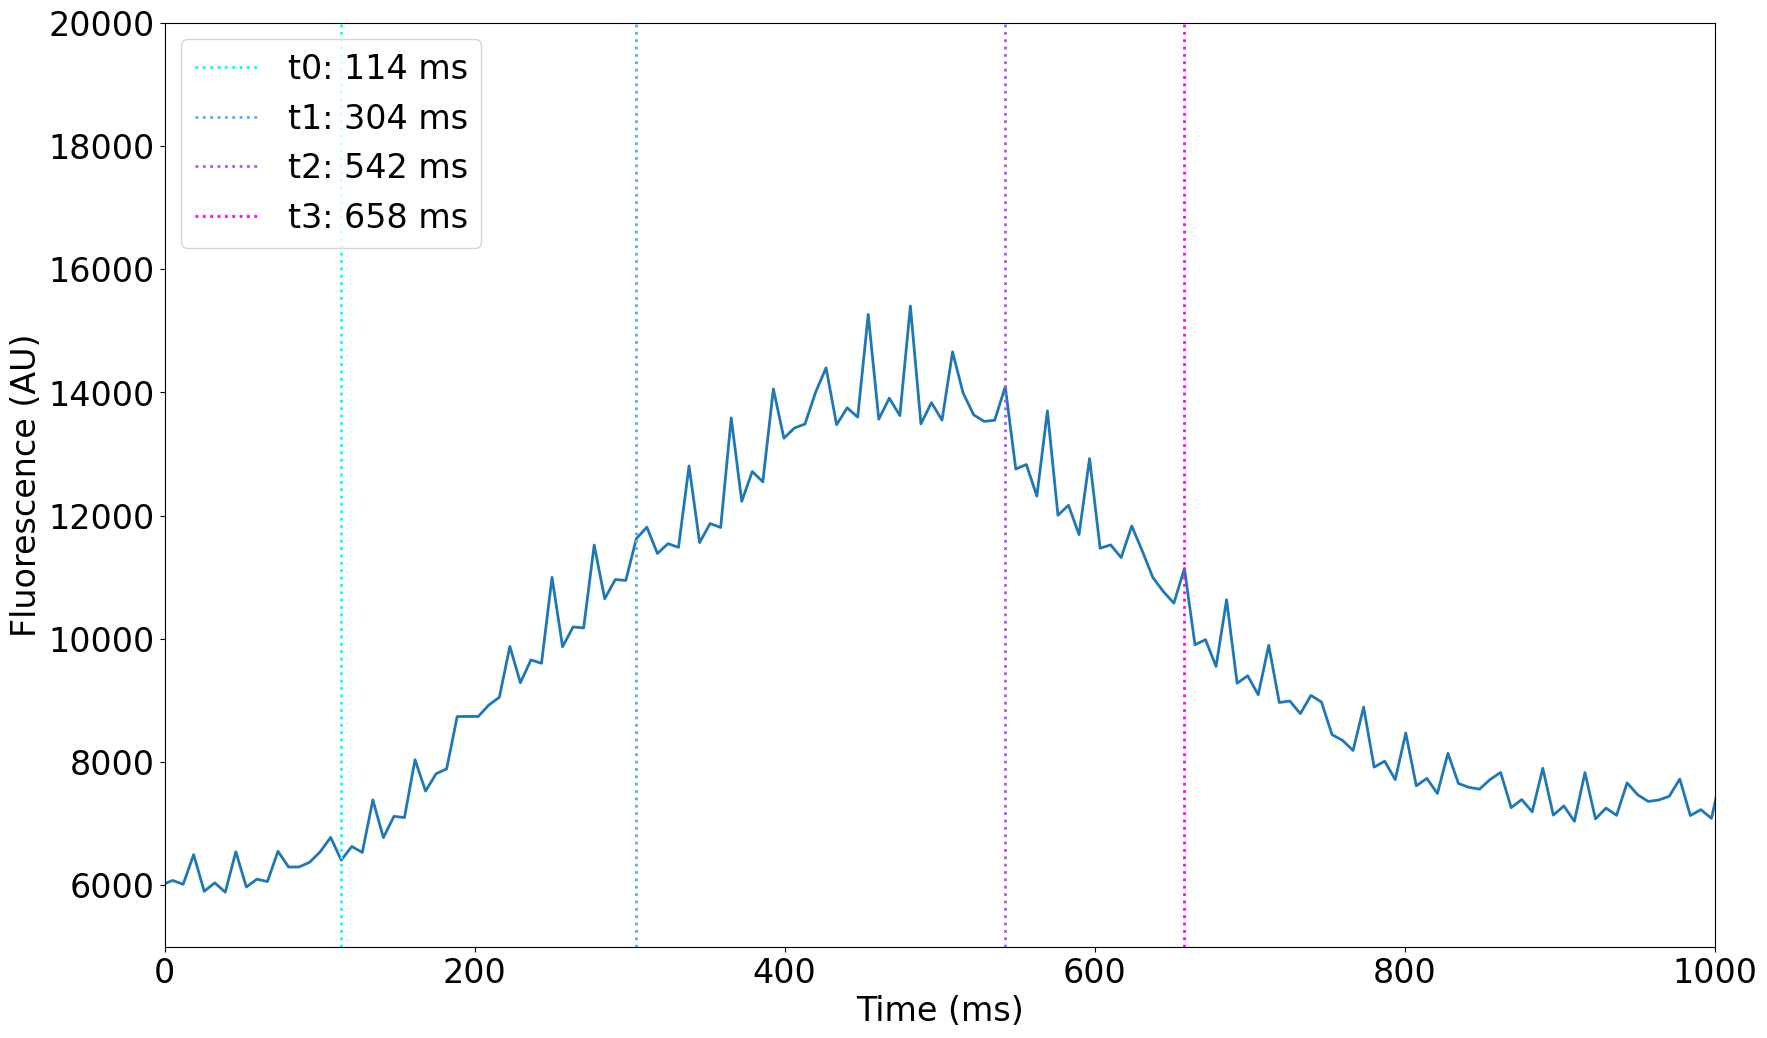

In [17]:
offset = 2300

time_steps_idx = [355, 383, 418, 435]
time_steps = [wave_event_df["Time_(ms)"][t] - offset for t in time_steps_idx]

wave_event_df["Time_(ms)"] = wave_event_df["Time_(ms)"].subtract(offset)

fig, ax = plt.subplots()
wave_event_df.plot(
    figsize=(20, 12),
    ax=ax,
    x="Time_(ms)",
    y="Fluorescence_(AU)",
    xlabel="Time (ms)",
    ylabel="Fluorescence (AU)",
    xlim=(0, 1000),
    ylim=(5000, 20000),
    legend=False,
    lw=2,
    label="_nolegend_",
    # fontsize=16
)

color = cm.cool(np.linspace(0, 1, len(time_steps)))
for i, t in enumerate(time_steps):
    ax.axvline(t, color=color[i], linestyle="dotted", lw=2, label=f"t{i}: {t:.0f} ms")

plt.legend(loc=2)
plt.savefig(
    os.path.join(wave_sample_data_dir, "wave_example_plot.png"), bbox_inches="tight"
)

## Puffs and waves IoUs + MCC (TOLEDO)

In [18]:
ys_classes = ["puffs", "waves"]
metrics = ["iou", "mcc"]

In [19]:
per_pixel_rows = []
for event_class in ys_classes:
    # load saved dict and get rows for dataframe
    dict_filename = os.path.join(per_pixel_res_dir, event_class + "_results.json")
    with open(dict_filename, "r") as f:
        res = json.load(f)  # movie_name x t x min_r x exclusion_r x video_id x metrics

        for movie_name, t_res in res.items():
            for t, min_r_res in t_res.items():
                for min_r, exclusion_r_res in min_r_res.items():
                    for exclusion_r, val in exclusion_r_res.items():
                        res[movie_name][t][min_r][exclusion_r]["iou"] = (
                            val["tp"] / (val["tp"] + val["fn"] + val["fp"])
                            if (val["tp"] + val["fn"] + val["fp"]) != 0
                            else 1.0
                        )
                        res[movie_name][t][min_r][exclusion_r]["dice"] = (
                            val["tp"] / (2 * val["tp"] + val["fn"] + val["fp"])
                            if (val["tp"] + val["fn"] + val["fp"]) != 0
                            else 1.0
                        )
                        res[movie_name][t][min_r][exclusion_r]["prec"] = (
                            val["tp"] / (val["tp"] + val["fp"])
                            if (val["tp"] + val["fp"]) != 0
                            else 1.0
                        )
                        res[movie_name][t][min_r][exclusion_r]["rec"] = (
                            val["tp"] / (val["tp"] + val["fn"])
                            if (val["tp"] + val["fn"]) != 0
                            else 1.0
                        )
                        res[movie_name][t][min_r][exclusion_r]["accuracy"] = (
                            val["tp"] + val["tn"]
                        ) / (val["tp"] + val["tn"] + val["fp"] + val["fn"])
                        res[movie_name][t][min_r][exclusion_r]["mcc"] = (
                            (val["tp"] * val["tn"] - val["fp"] * val["fn"])
                            / np.sqrt(
                                float(
                                    (val["tp"] + val["fp"])
                                    * (val["tp"] + val["fn"])
                                    * (val["tn"] + val["fp"])
                                    * (val["tn"] + val["fn"])
                                )
                            )
                            if (val["tp"] + val["fp"])
                            * (val["tp"] + val["fn"])
                            * (val["tn"] + val["fp"])
                            * (val["tn"] + val["fn"])
                            != 0
                            else 0.0
                        )

                        for metric_name, metric_val in val.items():
                            per_pixel_rows.append(
                                [
                                    event_class,
                                    movie_name,
                                    t,
                                    min_r,
                                    exclusion_r,
                                    metric_name,
                                    metric_val,
                                ]
                            )

In [20]:
per_pixel_df = pd.DataFrame(
    per_pixel_rows,
    columns=[
        "Event type",
        "Movie name",
        "Detection t",
        "Min r",
        "Exclusion r",
        "Metric",
        "Val",
    ],
)

In [21]:
per_pixel_df[
    (per_pixel_df["Metric"].isin(metrics)) & (per_pixel_df["Movie name"] == "05")
]

,Event type,Movie name,Detection t,Min r,Exclusion r,Metric,Val
4,puffs,05,0.0,0,0,iou,0.006076
9,puffs,05,0.0,0,0,mcc,0.012132
14,puffs,05,0.0,2,0,iou,0.006076
19,puffs,05,0.0,2,0,mcc,0.012132
24,puffs,05,0.0,4,0,iou,0.006076
...,...,...,...,...,...,...,...
9659,waves,05,argmax,2,0,mcc,0.000000
9664,waves,05,argmax,4,0,iou,1.000000
9669,waves,05,argmax,4,0,mcc,0.000000
9674,waves,05,argmax,6,0,iou,1.000000


In [22]:
metric_name = "mcc"
min_r = "0"
event_type = "waves"

thresholds = per_pixel_df["Detection t"].unique()
movie_names = per_pixel_df["Movie name"].unique()

In [23]:
thresholds, movie_names

(array(['0.0', '0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4',
        '0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75', '0.8', '0.85',
        '0.9', '0.95', '1.0', 'argmax'], dtype=object),
 array(['05', '10', '15', '20', '25', '32', '34', '40', '45', 'average'],
       dtype=object))

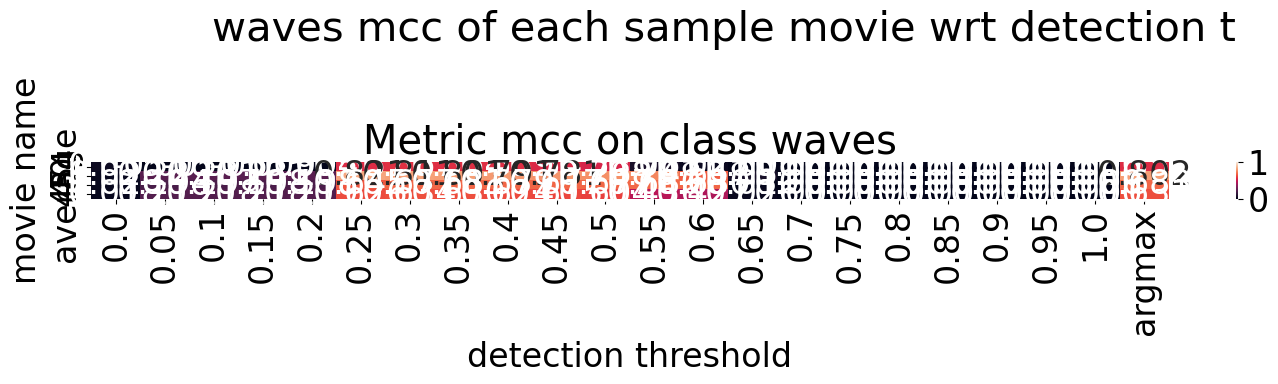

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 4), squeeze=False)
plt.subplots_adjust(hspace=0.1, wspace=0.01, top=0.85)
fig.suptitle(
    f"{event_type} {metric_name} of each sample movie wrt detection t", fontsize=30, y=1
)

i = 0
j = 0

# loop through metrics, thresholds and axes
df_values = per_pixel_df[
    (per_pixel_df["Event type"] == event_type)
    & (per_pixel_df["Min r"] == min_r)
    & (per_pixel_df["Metric"] == metric_name)
    & (per_pixel_df["Movie name"].isin(wave_movies_names + ["average"]))
]
# create pivot table, detection thresholds will be rows, min radius will be columns
piv = pd.pivot_table(
    df_values, values="Val", index=["Movie name"], columns=["Detection t"]
)

# plot pivot table as heatmap using seaborn
axs[i, j].set_title(f"Metric {metric_name} on class {event_type}")
sns.heatmap(piv, annot=True, fmt=".3f", vmin=0, vmax=1, ax=axs[i, j])  # , square=True)
axs[i, j].set_ylabel("movie name")
axs[i, j].set_xlabel("detection threshold")

plt.setp(axs[i, j].yaxis.get_majorticklabels(), rotation=90)  # rotate y labels
plt.tight_layout()

# ax.get_legend().remove()

plt.savefig(
    os.path.join(
        per_pixel_res_dir, "MEETING_" + event_type + "_" + metric_name + "_heatmap.png"
    )
)

### Get movies that contain puffs or waves
number of annotated pixels = tp + fn

In [25]:
min_r = "0"
detection_t = "0.5"
exclusion_r = "0"
metrics_annot = ["tp", "fn"]

In [26]:
# movies that contain puffs
event_type = "puffs"


df_values = per_pixel_df[
    (per_pixel_df["Event type"] == event_type)
    & (per_pixel_df["Min r"] == min_r)
    & (per_pixel_df["Detection t"] == detection_t)
    & (per_pixel_df["Exclusion r"] == exclusion_r)
    & (per_pixel_df["Metric"].isin(metrics_annot))
]

# get list of movies that contains puffs
n_tp = df_values[(df_values["Metric"] == metrics_annot[0])]["Val"].values
n_fn = df_values[(df_values["Metric"] == metrics_annot[1])]["Val"].values

n_annot = n_tp + n_fn
puff_movies = n_annot > 0
puff_movies_names = [
    movie_name
    for movie_name, present in zip(movie_names, puff_movies)
    if present and movie_name != "average"
]
puff_movies_names

['05', '10', '15', '20', '25', '32', '34', '40']

In [27]:
# movies that contain waves
event_type = "waves"


df_values = per_pixel_df[
    (per_pixel_df["Event type"] == event_type)
    & (per_pixel_df["Min r"] == min_r)
    & (per_pixel_df["Detection t"] == detection_t)
    & (per_pixel_df["Exclusion r"] == exclusion_r)
    & (per_pixel_df["Metric"].isin(metrics_annot))
]

# get list of movies that contains waves
n_tp = df_values[(df_values["Metric"] == metrics_annot[0])]["Val"].values
n_fn = df_values[(df_values["Metric"] == metrics_annot[1])]["Val"].values

n_annot = n_tp + n_fn
wave_movies = n_annot > 0
wave_movies_names = [
    movie_name
    for movie_name, present in zip(movie_names, wave_movies)
    if present and movie_name != "average"
]
wave_movies_names

['34', '40', '45']

### Compute average IoU and MCC for movies that contain given event

In [18]:
exclusion_r = "0"

In [20]:
per_movie_per_pixel_rows = []
for event_class in ys_classes:
    # load saved dict and get rows for dataframe
    dict_filename = os.path.join(per_pixel_res_dir, event_class + "_results.json")
    with open(dict_filename, "r") as f:
        original_res = json.load(
            f
        )  # movie_name x t x min_r x exclusion_r x video_id x metrics
        for movie_name, t_res in original_res.items():
            if (event_class == "puffs") and (movie_name in puff_movies_names):
                for t, min_r_res in t_res.items():
                    for min_r, exclusion_r_res in min_r_res.items():
                        val = exclusion_r_res[exclusion_r]
                        per_movie_per_pixel_rows.append(
                            [
                                event_class,
                                movie_name,
                                t,
                                min_r,
                                "iou",
                                val["tp"] / (val["tp"] + val["fn"] + val["fp"])
                                if (val["tp"] + val["fn"] + val["fp"]) != 0
                                else 1.0,
                            ]
                        )
                        per_movie_per_pixel_rows.append(
                            [
                                event_class,
                                movie_name,
                                t,
                                min_r,
                                "mcc",
                                compute_mcc(val["tp"], val["tn"], val["fp"], val["fn"]),
                            ]
                        )

            if (event_class == "waves") and (movie_name in wave_movies_names):
                for t, min_r_res in t_res.items():
                    for min_r, exclusion_r_res in min_r_res.items():
                        val = exclusion_r_res[exclusion_r]
                        per_movie_per_pixel_rows.append(
                            [
                                event_class,
                                movie_name,
                                t,
                                min_r,
                                "iou",
                                val["tp"] / (val["tp"] + val["fn"] + val["fp"])
                                if (val["tp"] + val["fn"] + val["fp"]) != 0
                                else 1.0,
                            ]
                        )
                        per_movie_per_pixel_rows.append(
                            [
                                event_class,
                                movie_name,
                                t,
                                min_r,
                                "mcc",
                                compute_mcc(val["tp"], val["tn"], val["fp"], val["fn"]),
                            ]
                        )

per_movie_per_pixel_df = pd.DataFrame(
    per_movie_per_pixel_rows,
    columns=["Event type", "Movie name", "Detection t", "Min r", "Metric", "Val"],
)

In [21]:
event_class = "puffs"
metric = "iou"
min_radius = per_pixel_df["Min r"].unique()
thresholds = per_pixel_df["Detection t"].unique()

In [22]:
average_per_pixel_rows = []

for event_class in ys_classes:
    for metric in metrics:
        df_values = per_movie_per_pixel_df[
            (per_movie_per_pixel_df["Event type"] == event_class)
            & (per_movie_per_pixel_df["Metric"] == metric)
        ]

        for min_r in min_radius:
            for t in thresholds:
                avg = df_values[
                    (df_values["Min r"] == min_r) & (df_values["Detection t"] == t)
                ]["Val"].mean()
                average_per_pixel_rows.append([event_class, t, min_r, metric, avg])

average_per_pixel_df = pd.DataFrame(
    average_per_pixel_rows,
    columns=["Event type", "Detection t", "Min r", "Metric", "Val"],
)

In [24]:
average_per_pixel_df.to_csv(
    os.path.join(per_pixel_res_dir, "POSTER_average_metrics_puffs_waves.csv")
)

### Plot results

Average iou value for class puffs using argmax preds is 0.18001831902365972
Average iou value for class waves using argmax preds is 0.50840949166196
Average mcc value for class puffs using argmax preds is 0.3148731748551313
Average mcc value for class waves using argmax preds is 0.6800461799092142


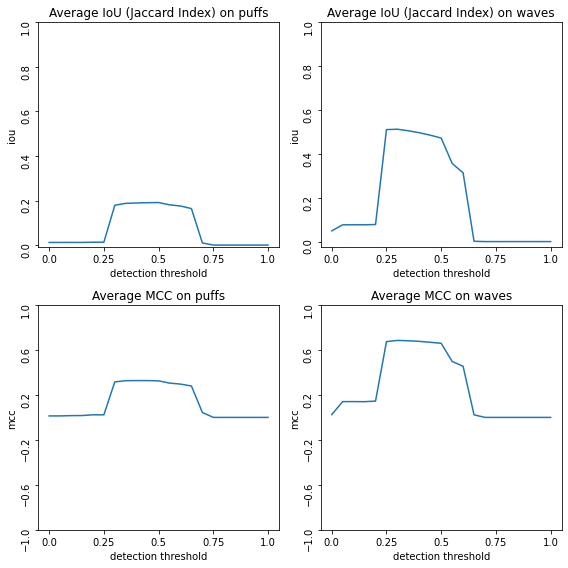

In [22]:
# create plot for all classes and all metrics
fig, axs = plt.subplots(
    nrows=len(metrics), ncols=len(ys_classes), figsize=(8, 8), squeeze=False
)
plt.subplots_adjust(hspace=0.1, wspace=0.01, top=0.85)
# fig.suptitle(f"Per pixel average metrics with respect to threshold", fontsize=20, y=1)

min_r = "0"
metric_full_name = {"iou": "IoU (Jaccard Index)", "mcc": "MCC"}

# loop through metrics, thresholds and axes
for i, metric_name in enumerate(metrics):
    for j, class_event in enumerate(ys_classes):
        df_values = average_per_pixel_df[
            (average_per_pixel_df["Event type"] == class_event)
            & (average_per_pixel_df["Metric"] == metric_name)
            & (average_per_pixel_df["Min r"] == min_r)
            & ~(average_per_pixel_df["Detection t"] == "argmax")
        ]

        argmax_val = average_per_pixel_df[
            (average_per_pixel_df["Event type"] == class_event)
            & (average_per_pixel_df["Metric"] == metric_name)
            & (average_per_pixel_df["Min r"] == min_r)
            & (average_per_pixel_df["Detection t"] == "argmax")
        ]["Val"].values[0]

        print(
            f"Average {metric_name} value for class {class_event} using argmax preds is {argmax_val}"
        )
        # create pivot table, detection thresholds will be rows, min radius will be columns
        piv = pd.pivot_table(
            df_values, values="Val", columns=["Metric"], index=["Detection t"]
        )

        # plot pivot table
        axs[i, j].set_title(f"Average {metric_full_name[metric_name]} on {class_event}")
        piv.plot(ax=axs[i, j])
        axs[i, j].set_ylabel(metric_name)

        if metric_name == "iou":
            axs[i, j].set_yticks(np.linspace(0, 1, 6))
        else:
            axs[i, j].set_yticks(np.linspace(-1, 1, 6))
        axs[i, j].set_xlabel("detection threshold")

        plt.setp(axs[i, j].yaxis.get_majorticklabels(), rotation=90)  # rotate y labels
        plt.tight_layout()

        axs[i, j].get_legend().remove()

plt.savefig(os.path.join(per_pixel_res_dir, "POSTER_average_metrics_puffs_waves.png"))

## Sparks precision, recall & F1-score (TOLEDO)

In [25]:
ys_classes = ["sparks"]
metrics = ["prec", "rec", "f1_score"]

In [26]:
spark_peaks_rows = []
for event_class in ys_classes:
    # load saved dict and get rows for dataframe
    dict_filename = os.path.join(spark_peaks_res_dir, event_class + "_results.json")
    with open(dict_filename, "r") as f:
        res = json.load(f)  # movie_name x t x min_r x video_id x metrics

        for movie_name, t_res in res.items():
            for t, min_r_res in t_res.items():
                for min_r, val in min_r_res.items():
                    res[movie_name][t][min_r]["prec"] = (
                        val["tp"] / (val["tp_fp"]) if (val["tp_fp"]) != 0 else 1.0
                    )
                    res[movie_name][t][min_r]["rec"] = (
                        val["tp"] / (val["tp_fn"]) if (val["tp_fn"]) != 0 else 1.0
                    )

                    betas = [0.5, 1, 2]
                    for beta in betas:
                        f_score = compute_f_score(
                            res[movie_name][t][min_r]["prec"],
                            res[movie_name][t][min_r]["rec"],
                            beta,
                        )
                        res[movie_name][t][min_r][f"f{beta}_score"] = f_score

                    for metric_name, metric_val in val.items():
                        spark_peaks_rows.append(
                            [event_class, movie_name, t, min_r, metric_name, metric_val]
                        )

In [27]:
spark_peaks_df = pd.DataFrame(
    spark_peaks_rows,
    columns=["Event type", "Movie name", "Detection t", "Min r", "Metric", "Val"],
)

In [28]:
spark_peaks_df[
    (spark_peaks_df["Metric"].isin(metrics)) & (spark_peaks_df["Movie name"] == "05")
]

,Event type,Movie name,Detection t,Min r,Metric,Val
3,sparks,05,0.0,0,prec,0.012635
4,sparks,05,0.0,0,rec,1.000000
6,sparks,05,0.0,0,f1_score,0.024955
11,sparks,05,0.0,1,prec,0.012635
12,sparks,05,0.0,1,rec,1.000000
...,...,...,...,...,...,...
340,sparks,05,argmax,0,rec,0.836364
342,sparks,05,argmax,0,f1_score,0.467005
347,sparks,05,argmax,1,prec,0.323944
348,sparks,05,argmax,1,rec,0.836364


In [29]:
metric_name = "rec"
min_r = "0"
event_type = "sparks"

thresholds = spark_peaks_df["Detection t"].unique()
movie_names = spark_peaks_df["Movie name"].unique()

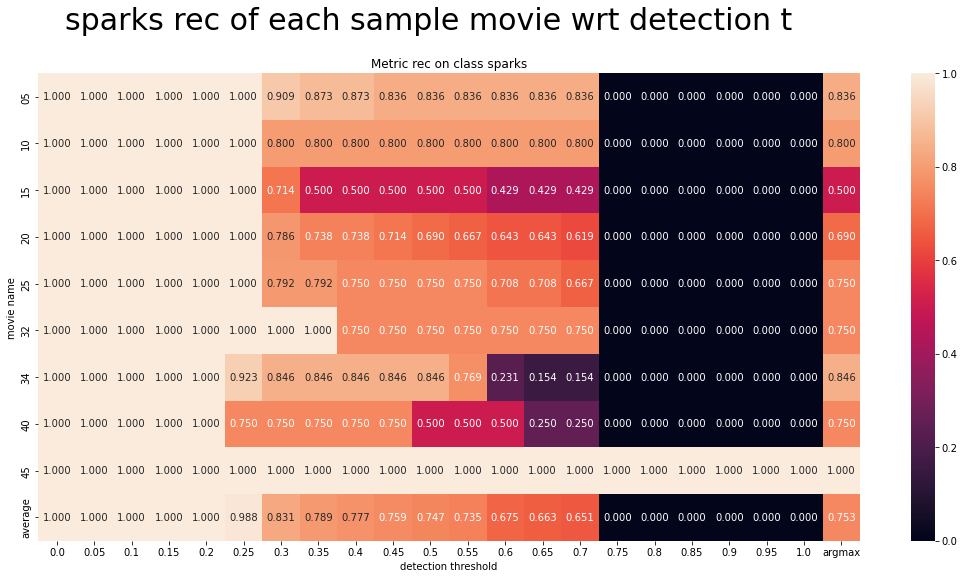

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 8), squeeze=False)
plt.subplots_adjust(hspace=0.1, wspace=0.01, top=0.85)
fig.suptitle(
    f"{event_type} {metric_name} of each sample movie wrt detection t",
    fontsize=30,
    y=1,
    x=0.4,
)

i = 0
j = 0

# loop through metrics, thresholds and axes
df_values = spark_peaks_df[
    (spark_peaks_df["Event type"] == event_type)
    & (spark_peaks_df["Min r"] == min_r)
    & (spark_peaks_df["Metric"] == metric_name)
]
# create pivot table, detection thresholds will be rows, min radius will be columns
piv = pd.pivot_table(
    df_values, values="Val", index=["Movie name"], columns=["Detection t"]
)

# plot pivot table as heatmap using seaborn
axs[i, j].set_title(f"Metric {metric_name} on class {event_type}")
sns.heatmap(piv, annot=True, fmt=".3f", vmin=0, vmax=1, ax=axs[i, j])  # , square=True)
axs[i, j].set_ylabel("movie name")
axs[i, j].set_xlabel("detection threshold")

plt.setp(axs[i, j].yaxis.get_majorticklabels(), rotation=90)  # rotate y labels
plt.tight_layout()

# ax.get_legend().remove()

plt.savefig(
    os.path.join(
        spark_peaks_res_dir,
        "MEETING_" + event_type + "_" + metric_name + "_heatmap.png",
    )
)

### Get movies that contain sparks
number of annotated pixels = tp + fn

In [31]:
min_r = "0"
detection_t = "0.5"
metrics_annot = "tp_fn"

In [32]:
# movies that contain puffs
event_type = "sparks"


df_values = spark_peaks_df[
    (spark_peaks_df["Event type"] == event_type)
    & (spark_peaks_df["Min r"] == min_r)
    & (spark_peaks_df["Detection t"] == detection_t)
    & (spark_peaks_df["Metric"] == metrics_annot)
]

# get list of movies that contains sparks
n_annot = df_values[(df_values["Metric"] == metrics_annot)]["Val"].values
spark_movies = n_annot > 0
spark_movies_names = [
    movie_name
    for movie_name, present in zip(movie_names, spark_movies)
    if present and movie_name != "average"
]
spark_movies_names

['05', '10', '15', '20', '25', '32', '34', '40']

### Compute average prec, rec and F1 score for movies that contain sparks

In [33]:
per_movie_spark_peaks_rows = []
for event_class in ys_classes:
    # load saved dict and get rows for dataframe
    dict_filename = os.path.join(spark_peaks_res_dir, event_class + "_results.json")
    with open(dict_filename, "r") as f:
        original_res = json.load(f)  # movie_name x t x min_r x video_id x metrics
        for movie_name, t_res in original_res.items():
            if (event_class == "sparks") and (movie_name in puff_movies_names):
                for t, min_r_res in t_res.items():
                    for min_r, val in min_r_res.items():
                        prec = (
                            val["tp"] / (val["tp_fp"]) if (val["tp_fp"]) != 0 else 1.0
                        )
                        rec = val["tp"] / (val["tp_fn"]) if (val["tp_fn"]) != 0 else 1.0
                        per_movie_spark_peaks_rows.append(
                            [event_class, movie_name, t, min_r, "prec", prec]
                        )
                        per_movie_spark_peaks_rows.append(
                            [event_class, movie_name, t, min_r, "rec", rec]
                        )
                        per_movie_spark_peaks_rows.append(
                            [
                                event_class,
                                movie_name,
                                t,
                                min_r,
                                "f1_score",
                                compute_f_score(prec, rec, 1),
                            ]
                        )

            per_movie_spark_peaks_df = pd.DataFrame(
                per_movie_spark_peaks_rows,
                columns=[
                    "Event type",
                    "Movie name",
                    "Detection t",
                    "Min r",
                    "Metric",
                    "Val",
                ],
            )

In [34]:
event_class = "sparks"
metric = "f1_score"
min_radius = per_pixel_df["Min r"].unique()
thresholds = per_pixel_df["Detection t"].unique()

In [35]:
average_spark_peaks_rows = []

for event_class in ys_classes:
    for metric in metrics:
        df_values = per_movie_spark_peaks_df[
            (per_movie_spark_peaks_df["Event type"] == event_class)
            & (per_movie_spark_peaks_df["Metric"] == metric)
        ]

        for min_r in min_radius:
            for t in thresholds:
                avg = df_values[
                    (df_values["Min r"] == min_r) & (df_values["Detection t"] == t)
                ]["Val"].mean()
                average_spark_peaks_rows.append([event_class, t, min_r, metric, avg])

average_spark_peaks_df = pd.DataFrame(
    average_spark_peaks_rows,
    columns=["Event type", "Detection t", "Min r", "Metric", "Val"],
)

In [36]:
average_spark_peaks_df.to_csv(
    os.path.join(spark_peaks_res_dir, "POSTER_average_metrics_sparks.csv")
)

In [34]:
average_spark_peaks_df[
    (average_spark_peaks_df["Min r"] == min_r)
    & (average_spark_peaks_df["Metric"].isin(["prec", "rec"]))
    & ~(average_spark_peaks_df["Detection t"] == "argmax")
]

,Event type,Detection t,Min r,Metric,Val
66,sparks,0.0,6,prec,NaN
67,sparks,0.05,6,prec,NaN
68,sparks,0.1,6,prec,NaN
69,sparks,0.15,6,prec,NaN
70,sparks,0.2,6,prec,NaN
71,sparks,0.25,6,prec,NaN
72,sparks,0.3,6,prec,NaN
73,sparks,0.35,6,prec,NaN
74,sparks,0.4,6,prec,NaN
75,sparks,0.45,6,prec,NaN


### Plot results

Average prec value for class sparks using argmax preds is 0.286103285210798
Average rec value for class sparks using argmax preds is 0.7403742091242091
Average f1_score value for class sparks using argmax preds is 0.3943836354445309


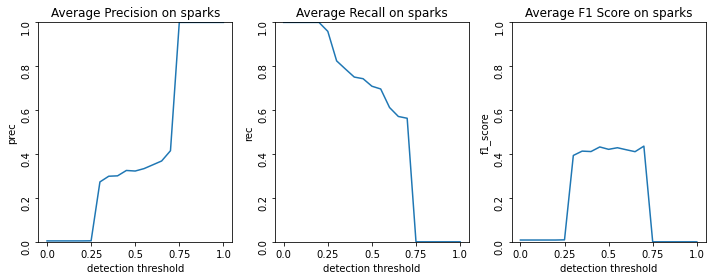

In [35]:
# create plot for all classes and all metrics
# fig, axs = plt.subplots(ncols=len(metrics)+1, nrows=1, figsize=(10, 4), squeeze = False)
fig, axs = plt.subplots(ncols=len(metrics), nrows=1, figsize=(10, 4), squeeze=False)
plt.subplots_adjust(hspace=0.1, wspace=0.01, top=0.85)
# fig.suptitle(f"Per pixel average metrics with respect to threshold", fontsize=20, y=1)

min_r = "0"
metric_full_name = {"prec": "Precision", "rec": "Recall", "f1_score": "F1 Score"}

# loop through metrics, thresholds and axes
for j, metric_name in enumerate(metrics):
    for i, class_event in enumerate(ys_classes):
        df_values = average_spark_peaks_df[
            (average_spark_peaks_df["Event type"] == class_event)
            & (average_spark_peaks_df["Metric"] == metric_name)
            & (average_spark_peaks_df["Min r"] == min_r)
            & ~(average_spark_peaks_df["Detection t"] == "argmax")
        ]

        argmax_val = average_spark_peaks_df[
            (average_spark_peaks_df["Event type"] == class_event)
            & (average_spark_peaks_df["Metric"] == metric_name)
            & (average_spark_peaks_df["Min r"] == min_r)
            & (average_spark_peaks_df["Detection t"] == "argmax")
        ]["Val"].values[0]

        print(
            f"Average {metric_name} value for class {class_event} using argmax preds is {argmax_val}"
        )
        # create pivot table, detection thresholds will be rows, min radius will be columns
        piv = pd.pivot_table(
            df_values, values="Val", columns=["Metric"], index=["Detection t"]
        )

        # plot pivot table
        axs[i, j].set_title(f"Average {metric_full_name[metric_name]} on {class_event}")
        piv.plot(ax=axs[i, j])
        axs[i, j].set_ylabel(metric_name)
        axs[i, j].set_ylim(0, 1)
        axs[i, j].set_xlabel("detection threshold")

        plt.setp(axs[i, j].yaxis.get_majorticklabels(), rotation=90)  # rotate y labels
        plt.tight_layout()

        axs[i, j].get_legend().remove()

"""prec_list = average_spark_peaks_df[(average_spark_peaks_df['Event type']==class_event) 
                                           & (average_spark_peaks_df['Metric']=='prec')  
                                           & (average_spark_peaks_df['Min r']==min_r) 
                                           & ~(average_spark_peaks_df['Detection t']=='argmax')
                                          ]['Val'].values

rec_list = average_spark_peaks_df[(average_spark_peaks_df['Event type']==class_event) 
                                           & (average_spark_peaks_df['Metric']=='rec')  
                                           & (average_spark_peaks_df['Min r']==min_r) 
                                           & ~(average_spark_peaks_df['Detection t']=='argmax')
                                          ]['Val'].values



axs[0,3].set_title(f"Average precision-recall curve on sparks")
axs[0,3].plot(rec_list, prec_list, marker='.', linestyle='')
axs[0,3].set_ylabel('precision')
axs[0,3].set_ylim(0,1)
axs[0,3].set_xlabel('recall')

plt.setp(axs[0,3].yaxis.get_majorticklabels(), rotation=90) # rotate y labels"""
plt.tight_layout()
plt.savefig(os.path.join(spark_peaks_res_dir, "POSTER_average_metrics_sparks.png"))

# SAN DIEGO

## Plots for Biophys conference (e.g. Napari visualisation)

### Load movies, annotations & predictions

In [22]:
classes = ["sparks", "puffs", "waves"]

movie_ids = ["05", "10", "15", "20", "25", "32", "34", "40", "45"]
# movie_ids = ["05","34"]

In [23]:
### Load movies
input_movies = load_movies_ids(
    data_folder=dataset_dir, ids=movie_ids, names_available=True, movie_names="video"
)

### Load annotations
# segmentation masks
ys = load_annotations_ids(
    data_folder=dataset_dir, ids=movie_ids, mask_names="class_label"
)

# event masks
ys_events = load_annotations_ids(
    data_folder=dataset_dir, ids=movie_ids, mask_names="event_label"
)

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


In [ ]:
### Load predictions
sparks_filenames = {
    movie_id: os.path.join(preds_dir, f"{training_name}_{epoch}_{movie_id}_sparks.tif")
    for movie_id in movie_ids
}
puffs_filenames = {
    movie_id: os.path.join(preds_dir, f"{training_name}_{epoch}_{movie_id}_puffs.tif")
    for movie_id in movie_ids
}
waves_filenames = {
    movie_id: os.path.join(preds_dir, f"{training_name}_{epoch}_{movie_id}_waves.tif")
    for movie_id in movie_ids
}

sparks = {
    movie_id: np.asarray(imageio.volread(f)) for movie_id, f in sparks_filenames.items()
}
puffs = {
    movie_id: np.asarray(imageio.volread(f)) for movie_id, f in puffs_filenames.items()
}
waves = {
    movie_id: np.asarray(imageio.volread(f)) for movie_id, f in waves_filenames.items()
}

In [13]:
preds_segmentation = {}

for movie_id in movie_ids:
    raw_preds_dict = {
        "sparks": sparks[movie_id],
        "puffs": puffs[movie_id],
        "waves": waves[movie_id],
    }
    _, preds_segmentation[movie_id], _ = process_raw_predictions(
        raw_preds_dict=raw_preds_dict,
        input_movie=input_movies[movie_id],
    )

### Configure Napari

In [14]:
print("Original themes", available_themes())

Original themes ('dark', 'light', 'system')


In [15]:
# configure Napari cmap
cmap = get_discrete_cmap(name="gray", lut=16)
labels_cmap = get_labels_cmap()

### Visualise movies

In [137]:
movie_id = "15"

In [25]:
# get predicted segmentation with values between 0 and 3
preds = preds_dict_to_mask(preds_segmentation[movie_id])

KeyError: '15'

### Compare annotazione and preds

In [85]:
# get contours of annotated mask, for visualization
ys_contours = get_annotations_contour(annotations=ys[movie_id], contour_val=2)

In [19]:
viewer = napari.Viewer()
viewer.theme = "dark"

viewer.add_image(
    input_movies[movie_id], name="original movie", colormap=("colors", cmap)
)

viewer.add_labels(preds, name="predicted segmentation", opacity=0.5, color=labels_cmap)

viewer.add_labels(
    ys_contours, name="annotated segmentation", opacity=0.8, color=labels_cmap
)

<Labels layer 'annotated segmentation' at 0x2859ad3e100>

### Plot annotations (segmentation and events)

In [121]:
viewer = napari.Viewer()
viewer.theme = "light"

In [138]:
viewer.add_image(
    input_movies[movie_id], name="original movie", colormap=("colors", cmap)
)

viewer.add_labels(
    ys[movie_id], name="annotated segmentation", opacity=0.8, color=labels_cmap
)

viewer.add_labels(
    ys_events[movie_id],
    name="annotated segmentation",
    opacity=0.8,
    # color=labels_cmap
)

<Labels layer 'annotated segmentation [3]' at 0x285b78918b0>

### Save images on disk

In [38]:
out_dir = r"C:\Users\prisc\OneDrive - Universitaet Bern\CONFERENCES SYMPOSIUMS etc\biophysical conference 2023\figures"

In [147]:
frame_id = 238

In [126]:
# viewer.add_image(screenshot, rgb=True, name='screenshot')

In [146]:
screenshot = viewer.screenshot()
out_f = f"movie_{movie_id}_{frame_id}_segmentation.png"

imsave(os.path.join(out_dir, out_f), screenshot)

In [144]:
screenshot = viewer.screenshot()
out_f = f"movie_{movie_id}_{frame_id}_events.png"

imsave(os.path.join(out_dir, out_f), screenshot)

In [145]:
screenshot = viewer.screenshot()
out_f = f"movie_{movie_id}_{frame_id}_original.png"

imsave(os.path.join(out_dir, out_f), screenshot)

### create confusion matrix manually

In [17]:
# set directory where plots will be saved
out_dir = r"C:\Users\dotti\OneDrive - Universitaet Bern\manuscript figures"

In [22]:
font = {"weight": "normal", "size": 48}  #'family' : 'normal',
matplotlib.rc("font", **font)

# set up matplotlib parameters so that .svg can correctly be processed in illustrator
matplotlib.rcParams["svg.fonttype"] = "none"

(4, 4)
(4, 4)


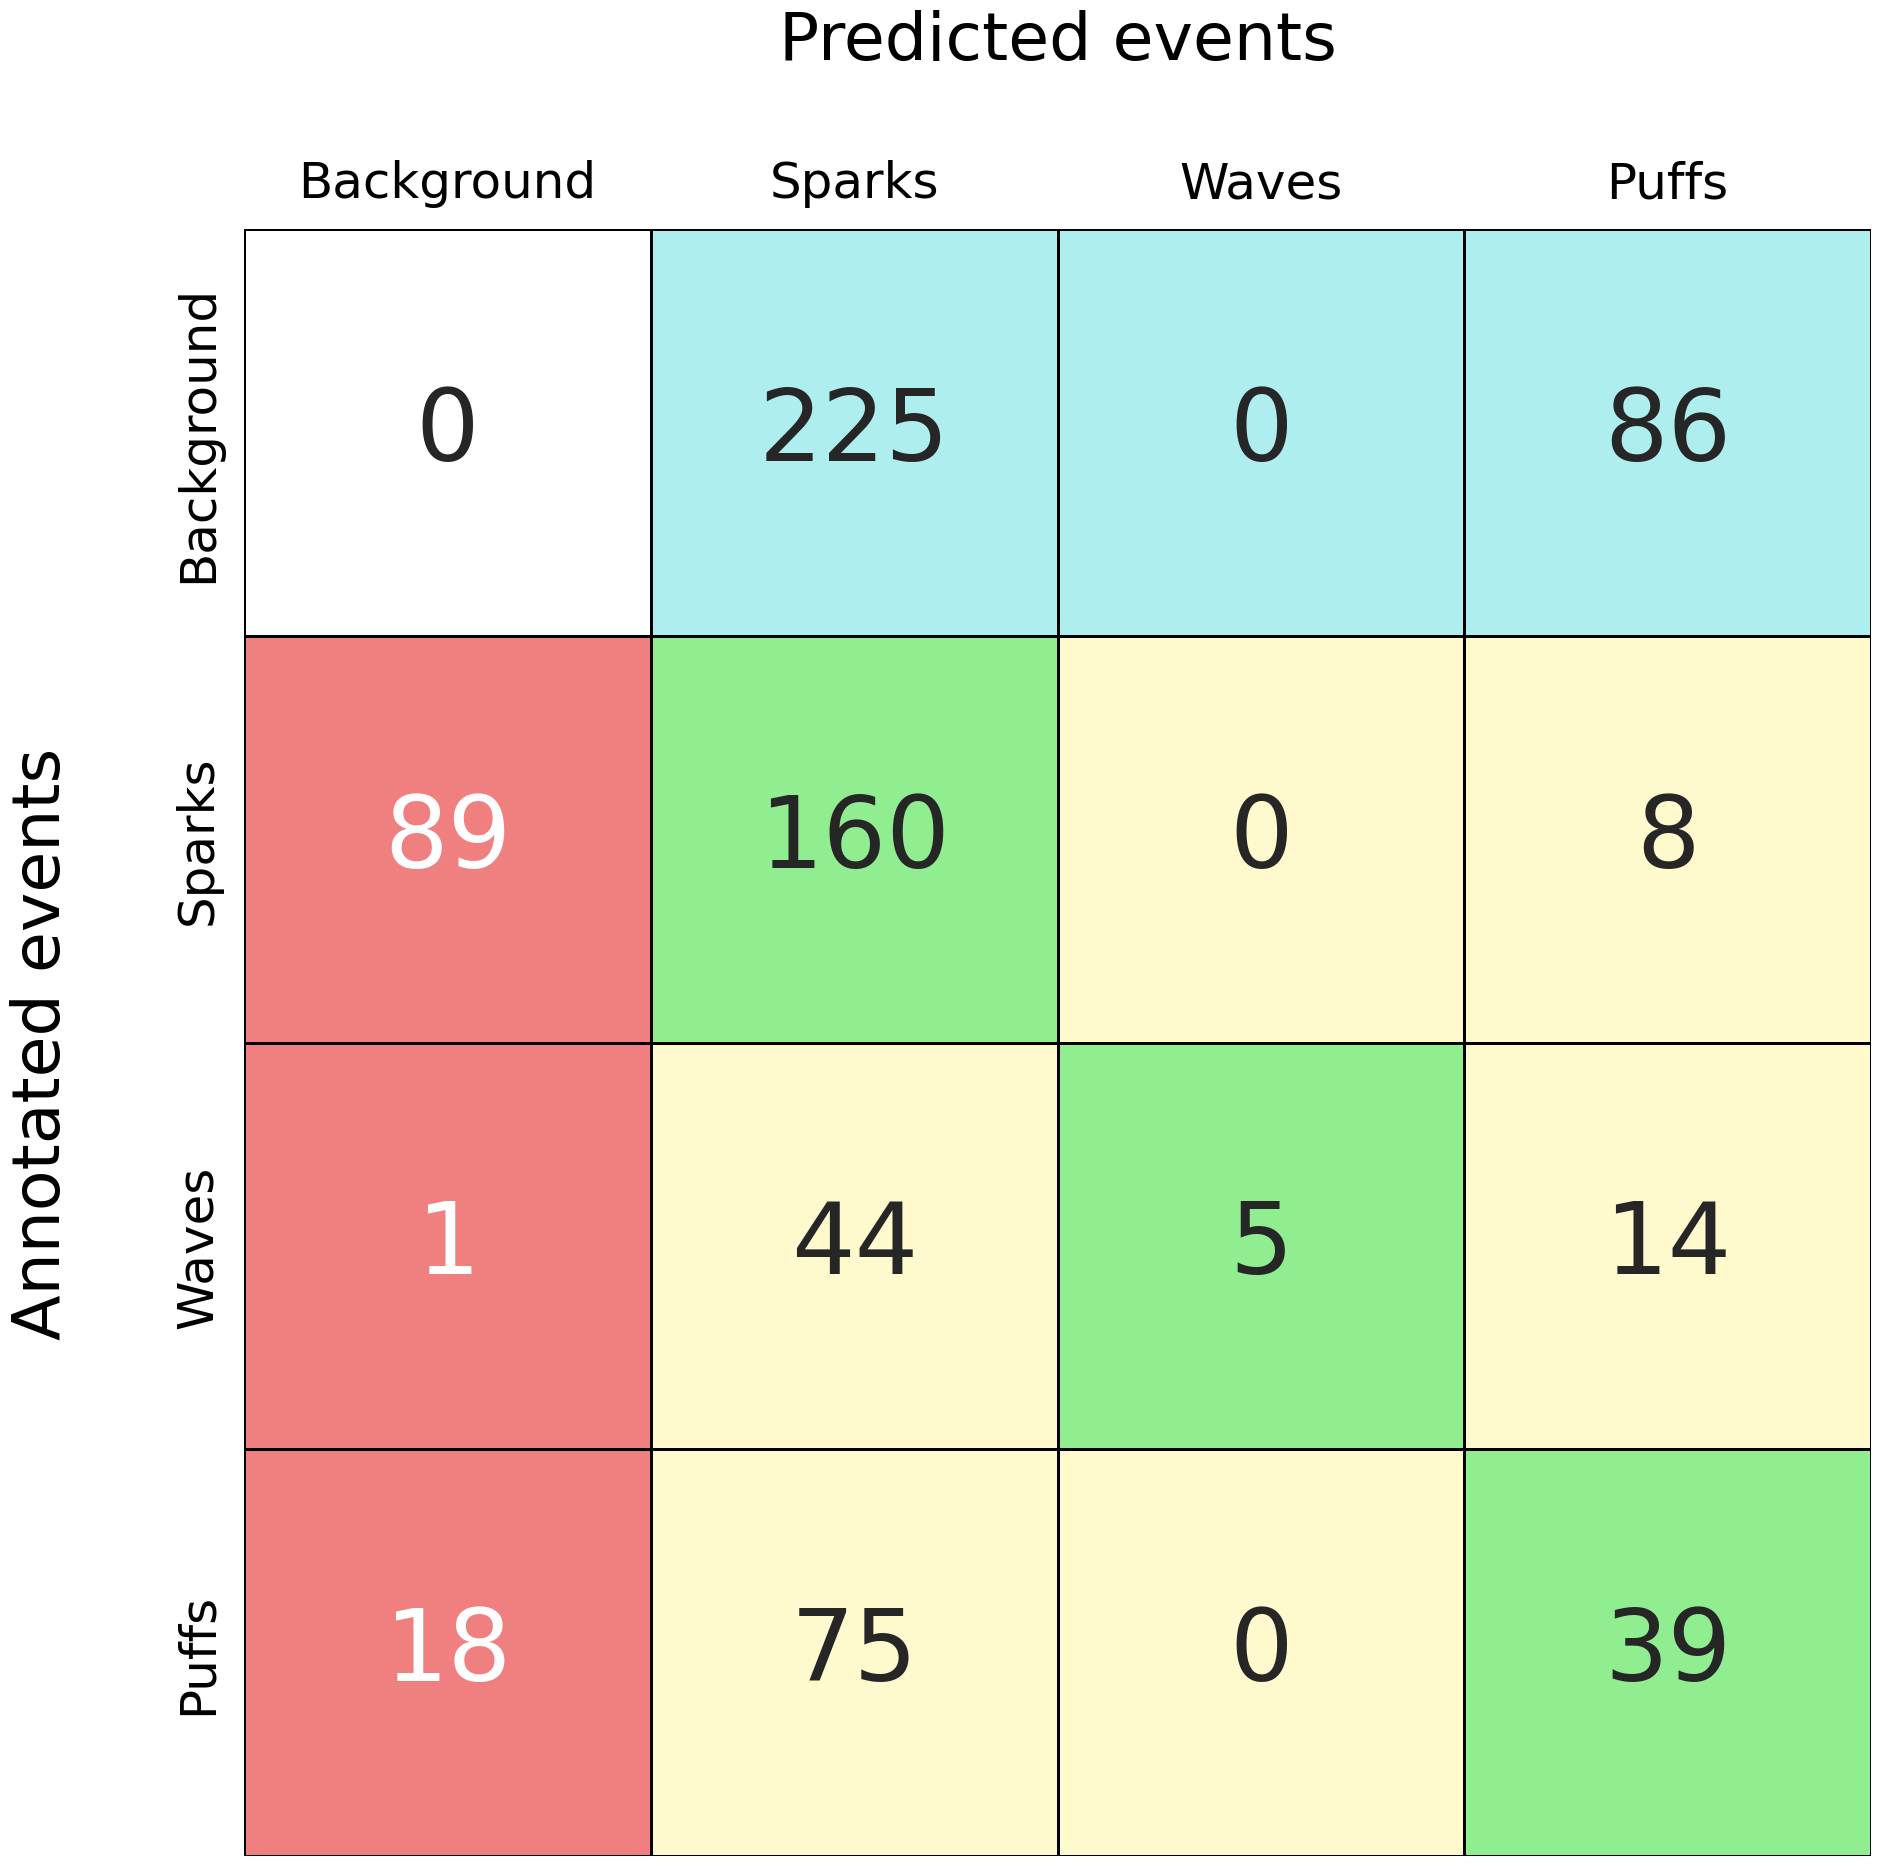

In [34]:
n_rows = 1
n_cols = 1
num_plots = n_rows * n_cols

pad = 5  # in points

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))

cols = ["IoU"]
tick_labels = ["Background", "Sparks", "Waves", "Puffs"]

# axs.annotate(cols[0], xy=(0.5, 1.2), xytext=(0, pad),
#                 xycoords='axes fraction', textcoords='offset points',
#                 size='large', ha='center', va='baseline')


# axs.annotate('All movies', xy=(0, 0.5), xytext=(-axs.yaxis.labelpad - pad, 0),
#                 xycoords=axs.yaxis.label, textcoords='offset points',
#                 size='large', ha='right', va='center')

# fig.suptitle("Confusion matrices", fontsize=36, y=1)


# configure heatmap background
colors = sns.color_palette(
    ["white", "lightcoral", "paleturquoise", "lemonchiffon", "lightgreen"], as_cmap=True
)
colored_bg = np.array([[0, 2, 2, 2], [1, 4, 3, 3], [1, 3, 4, 3], [1, 3, 3, 4]])

# Get array with confusion matrices to be plotted
cm = np.array(
    [[0, 225, 0, 86], [89, 160, 0, 8], [1, 44, 5, 14], [18, 75, 0, 39]]
).astype(int)

print(cm.shape)
print(colored_bg.shape)
sns.heatmap(
    data=colored_bg,
    cmap=colors,
    annot=cm,
    fmt="",
    annot_kws={"fontsize": 72},
    cbar=False,
    square=True,
    ax=ax,
    linewidths=1,
    linecolor="black",
)

ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.tick_params(axis="both", which="major", pad=16)

ax.set_xlabel("Predicted events", labelpad=72)
ax.xaxis.set_label_position("top")
ax.set_xticklabels(tick_labels, rotation=0, ha="center", fontsize=36)
# ax.add_patch(plt.Rectangle((-0.01, 1), 1.01, 0.1, color='yellow', clip_on=False, zorder=0, transform=ax.transAxes))

ax.set_ylabel("Annotated events", labelpad=72)
ax.set_yticklabels(tick_labels, rotation=90, va="center", fontsize=36)
# ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='yellow', clip_on=False, zorder=0, transform=ax.transAxes))

# plt.subplots_adjust(hspace=0.005, wspace=0.)
# plt.subplots_adjust(hspace=0.1, wspace=0.1, top=0.9, left=0.05, right=0.95)
# fig.subplots_adjust(left=0.15, top=0.95)
fig.subplots_adjust(wspace=1.5)
plt.tight_layout()

plt.savefig(os.path.join(out_dir, "events_confusion_matrix.svg"), transparent=True)
plt.show()